In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import math

In [0]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_sub = pd.read_csv("sampleSubmission.csv")

In [0]:
f = lambda x: np.sign(x) * np.power(abs(x), 1./3)

In [0]:
train['cubic_root_x'] = f(train['x'])
train['cubic_root_y'] = f(train['y'])
train['cubic_root_z'] = f(train['z'])
train['cubic_root_table'] = f(train['table'])
train['cubic_root_depth'] = f(train['depth'])
train['cubic_root_carat'] = f(train['carat'])


In [0]:
train['log_y'] = np.log(train['y']+1)
train['log_x'] = np.log(train['x']+1)
train['log_depth'] = np.log(train['depth'])
train['log_table'] = np.log(train['table'])
train['log_price'] = np.log(train['price'])



In [0]:


test['log_carat'] = np.log(test['carat'])
test['log_depth'] = np.log(test['depth'])
test['log_table'] = np.log(test['table'])

test['cubic_root_carat'] = f(test['carat'])
test['cubic_root_x'] = f(test['x'])
test['cubic_root_y'] = f(test['y'])
test['cubic_root_z'] = f(test['z'])
test['cubic_root_table'] = f(test['table'])
test['cubic_root_depth'] = f(test['depth'])
test['log_y'] = np.log(test['y']+1)


In [0]:
train['log_z'] = np.log(train['z']+1)
test['log_z'] = np.log(test['z']+1)

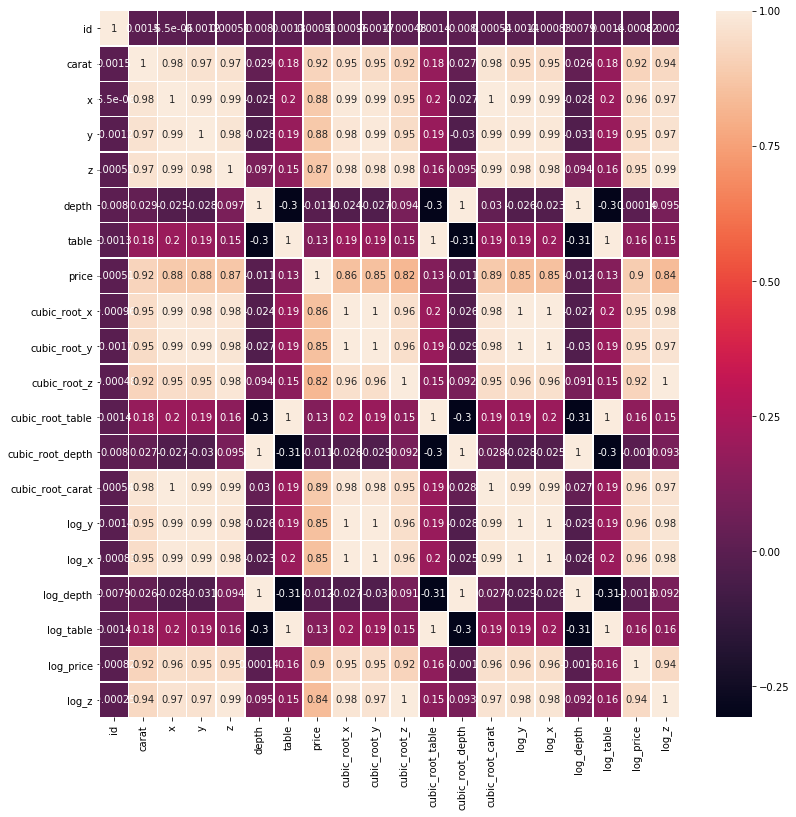

In [22]:
tcor = train.corr()
fig, ax = plt.subplots(figsize=(13,13))         # Sample figsize in inches
sb.heatmap(tcor, annot=True, linewidths=.5, ax=ax)

### AQUI MUDAMOS O DATASET

In [0]:
train1h = pd.get_dummies(train)

In [0]:
test1h = pd.get_dummies(test)

In [25]:
train1h.head()

,id,carat,x,y,z,depth,table,price,cubic_root_x,cubic_root_y,cubic_root_z,cubic_root_table,cubic_root_depth,cubic_root_carat,log_y,log_x,log_depth,log_table,log_price,log_z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,20000,0.35,4.44,4.48,2.80,62.8,58.0,798,1.643593,1.648514,1.409460,3.870877,3.974842,0.704730,1.701105,1.693779,4.139955,4.060443,6.682109,1.335001,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,20001,0.70,5.66,5.69,3.55,62.6,56.0,2089,1.782128,1.785271,1.525490,3.825862,3.970618,0.887904,1.900614,1.896119,4.136765,4.025352,7.644441,1.515127,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,20002,0.32,4.42,4.38,2.70,61.4,56.0,990,1.641122,1.636156,1.392477,3.825862,3.945083,0.683990,1.682688,1.690096,4.117410,4.025352,6.897705,1.308333,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,20003,0.30,4.32,4.35,2.67,61.7,54.2,631,1.628651,1.632412,1.387300,3.784424,3.951498,0.669433,1.677097,1.671473,4.122284,3.992681,6.447306,1.300192,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,20004,0.33,4.41,4.47,2.76,62.2,59.0,579,1.639883,1.647287,1.402716,3.892996,3.962143,0.691042,1.699279,1.688249,4.130355,4.077537,6.361302,1.324419,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [0]:
predicao = test1h[['cubic_root_table','cubic_root_carat','cubic_root_x','log_y','z','cut_Fair','cut_Good','cut_Ideal','cut_Premium','cut_Very Good','color_D','color_E','color_F','color_G','color_H','color_I','color_J','clarity_I1','clarity_IF','clarity_SI1','clarity_SI2','clarity_VS1','clarity_VS2','clarity_VVS1','clarity_VVS2']]
Data_set = train1h[['cubic_root_table','cubic_root_carat','cubic_root_x','log_y','z','cut_Fair','cut_Good','cut_Ideal','cut_Premium','cut_Very Good','color_D','color_E','color_F','color_G','color_H','color_I','color_J','clarity_I1','clarity_IF','clarity_SI1','clarity_SI2','clarity_VS1','clarity_VS2','clarity_VVS1','clarity_VVS2','log_price']]

In [27]:
Data_set.head()

,cubic_root_table,cubic_root_carat,cubic_root_x,log_y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,log_price
0,3.870877,0.704730,1.643593,1.701105,2.80,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,6.682109
1,3.825862,0.887904,1.782128,1.900614,3.55,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,7.644441
2,3.825862,0.683990,1.641122,1.682688,2.70,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,6.897705
3,3.784424,0.669433,1.628651,1.677097,2.67,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,6.447306
4,3.892996,0.691042,1.639883,1.699279,2.76,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,6.361302


In [0]:
X = Data_set.drop(columns=['log_price'])

In [0]:
Y = Data_set['log_price']


### SECAO LIVRE

In [0]:
from sklearn.model_selection import KFold, cross_validate, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

#3013 0.9905700144108485


cv = KFold(n_splits=10)
SEED = 301
np.random.seed(301)



def teste_modelo(modelo, dadosx, dadosy):
  np.random.seed(301)
  nome = ""
  model = str(modelo)
  for i in range(len(model)):
    if model[i] != "(":
      nome = model[0:i+1]
    else:
      results = cross_validate(modelo, dadosx, dadosy, cv = cv, return_train_score=True)
      print("Resultados para o modelo : {} - {}".format(nome, results['test_score'].mean()))


In [0]:
#rfr = RandomForestRegressor(random_state=SEED)

In [0]:
#teste_modelo(rfr, X,Y)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

X_train, X_test, y_train, y_test = train_test_split(X,Y)

In [0]:
# clf_rf = RandomForestRegressor()
# clf_rf.fit(X_train , y_train)
# accuracies = cross_val_score(estimator = clf_rf, X = X_train, y = y_train, cv = 5,verbose = 1)
# y_pred = clf_rf.predict(X_test)
# print('')
# print('###### Random Forest ######')
# print('Score : %.4f' % clf_rf.score(X_test, y_test))
# print(accuracies)

# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# rmse = mean_squared_error(y_test, y_pred)**0.5
# r2 = r2_score(y_test, y_pred)

# print('')
# print('MSE    : %0.2f ' % mse)
# print('MAE    : %0.2f ' % mae)
# print('RMSE   : %0.2f ' % rmse)
# print('R2     : %0.2f ' % r2)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



###### Random Forest ######
Score : 0.9904
[0.98941827 0.99113618 0.98960537 0.99039473 0.98931956]

MSE    : 0.01 
MAE    : 0.07 
RMSE   : 0.10 
R2     : 0.99 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.9s finished


In [0]:
# no_of_test=[100]

# params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
# clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict)
# clf_rf.fit(X_train,y_train)
# print('Score : %.4f' % clf_rf.score(X_test, y_test))
# pred=clf_rf.predict(X_test)
# r2 = r2_score(y_test, pred)
# print('R2     : %0.2f ' % r2)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Score : 0.9914
R2     : 0.99 


In [0]:
# clf_rf.fit(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_features': ['auto', '

In [0]:
# predicao.head()

,cubic_root_depth,cubic_root_table,cubic_root_carat,cubic_root_x,log_y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,3.972731,3.870877,1.220929,1.978946,2.161022,4.84,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,3.955763,3.870877,1.035399,1.878615,2.034706,4.11,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,3.947223,3.802952,0.804145,1.731367,1.827770,3.20,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,3.962143,3.825862,1.016396,1.868168,2.014903,4.05,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,3.960018,3.870877,0.887904,1.778973,1.899118,3.51,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [0]:
# np.exp(clf_rf.predict(predicao))

array([13211.67521141,  5172.23827444,  2359.50858648, ...,
        1351.79405772,  2086.54361436,   791.78205753])

In [0]:
# sample_sub = sample_sub.drop(columns=['id'])


In [0]:
# sample_sub['price']=np.exp(clf_rf.predict(predicao))

In [0]:
# sample_sub.head()

,price
0,13211.675211
1,5172.238274
2,2359.508586
3,4816.160282
4,2300.111377


In [0]:
# train1h.query('x==0 or y==0 or z==0')

,id,carat,x,y,z,depth,table,price,cubic_root_x,cubic_root_y,cubic_root_z,cubic_root_table,cubic_root_depth,cubic_root_carat,log_y,log_x,log_depth,log_table,log_price,log_z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2


In [0]:
# sample_sub.to_csv('OptimizadoComCUbicRootDepth.csv')

In [0]:
# train['x'].median(), train['y'].median(), train['z'].median()

(5.7, 5.71, 3.52)

### LIMPANDO OS DADOS DO CONJUNTO DE TREINO

In [34]:
train.query('x==0')

,id,carat,cut,color,clarity,x,y,z,depth,table,price,cubic_root_x,cubic_root_y,cubic_root_z,cubic_root_table,cubic_root_depth,cubic_root_carat,log_y,log_x,log_depth,log_table,log_price,log_z
9734,29734,1.20,Premium,D,VVS1,0.0,0.0,0.0,62.1,59.0,15686,0.0,0.0,0.0,3.892996,3.960018,1.062659,0.0,0.0,4.128746,4.077537,9.660524,0.0
30141,50141,1.56,Ideal,G,VS2,0.0,0.0,0.0,62.2,54.0,12800,0.0,0.0,0.0,3.779763,3.962143,1.159778,0.0,0.0,4.130355,3.988984,9.457200,0.0
30804,50804,0.71,Good,F,SI2,0.0,0.0,0.0,64.1,60.0,2130,0.0,0.0,0.0,3.914868,4.002082,0.892112,0.0,0.0,4.160444,4.094345,7.663877,0.0


In [35]:
train.query("carat>1.00 and carat<1.3 and cut=='Premium' and color=='D' and clarity=='VVS1'")

,id,carat,cut,color,clarity,x,y,z,depth,table,price,cubic_root_x,cubic_root_y,cubic_root_z,cubic_root_table,cubic_root_depth,cubic_root_carat,log_y,log_x,log_depth,log_table,log_price,log_z
228,20228,1.01,Premium,D,VVS1,6.56,6.53,3.88,59.3,59.0,11480,1.871980,1.869122,1.571366,3.892996,3.899584,1.003322,2.018895,2.022871,4.082609,4.077537,9.348362,1.585145
3582,23582,1.21,Premium,D,VVS1,6.96,6.88,4.16,60.1,59.0,17192,1.909281,1.901937,1.608290,3.892996,3.917041,1.065602,2.064328,2.074429,4.096010,4.077537,9.752199,1.640937
9734,29734,1.20,Premium,D,VVS1,0.00,0.00,0.00,62.1,59.0,15686,0.000000,0.000000,0.000000,3.892996,3.960018,1.062659,0.000000,0.000000,4.128746,4.077537,9.660524,0.000000
29865,49865,1.11,Premium,D,VVS1,6.67,6.63,4.16,62.0,54.0,13405,1.882386,1.878615,1.608290,3.779763,3.957892,1.035399,2.032088,2.037317,4.127134,3.988984,9.503383,1.640937


In [36]:
train['x'][9734] = 6.72
train['y'][9734] = 6.69
train['z'][9734] = 4.16

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [37]:
train.query('y==0')

,id,carat,cut,color,clarity,x,y,z,depth,table,price,cubic_root_x,cubic_root_y,cubic_root_z,cubic_root_table,cubic_root_depth,cubic_root_carat,log_y,log_x,log_depth,log_table,log_price,log_z
30141,50141,1.56,Ideal,G,VS2,0.0,0.0,0.0,62.2,54.0,12800,0.0,0.0,0.0,3.779763,3.962143,1.159778,0.0,0.0,4.130355,3.988984,9.457200,0.0
30804,50804,0.71,Good,F,SI2,0.0,0.0,0.0,64.1,60.0,2130,0.0,0.0,0.0,3.914868,4.002082,0.892112,0.0,0.0,4.160444,4.094345,7.663877,0.0


In [38]:
train.query("carat>1.5 and carat<1.6 and cut=='Ideal' and color=='G' and clarity=='VS2'")

,id,carat,cut,color,clarity,x,y,z,depth,table,price,cubic_root_x,cubic_root_y,cubic_root_z,cubic_root_table,cubic_root_depth,cubic_root_carat,log_y,log_x,log_depth,log_table,log_price,log_z
2579,22579,1.51,Ideal,G,VS2,7.33,7.38,4.57,62.1,55.0,13532,1.942531,1.946938,1.659480,3.802952,3.960018,1.147252,2.125848,2.119863,4.128746,4.007333,9.512813,1.717395
2737,22737,1.52,Ideal,G,VS2,7.38,7.45,4.56,61.5,56.0,13153,1.946938,1.953074,1.658269,3.825862,3.947223,1.149779,2.134166,2.125848,4.119037,4.025352,9.484405,1.715598
6241,26241,1.54,Ideal,G,VS2,7.44,7.46,4.53,60.8,57.0,15395,1.952200,1.953948,1.654624,3.848501,3.932190,1.154800,2.135349,2.132982,4.107590,4.043051,9.641798,1.710188
6650,26650,1.55,Ideal,G,VS2,7.45,7.48,4.60,61.6,55.0,13912,1.953074,1.955692,1.663103,3.802952,3.949362,1.157295,2.137710,2.134166,4.120662,4.007333,9.540507,1.722767
6857,26857,1.51,Ideal,G,VS2,7.39,7.46,4.52,60.9,57.0,13752,1.947817,1.953948,1.653406,3.848501,3.934345,1.147252,2.135349,2.127041,4.109233,4.043051,9.528940,1.708378
8308,28308,1.51,Ideal,G,VS2,7.28,7.36,4.55,62.2,57.0,12947,1.938104,1.945178,1.657056,3.848501,3.962143,1.147252,2.123458,2.113843,4.130355,4.043051,9.468619,1.713798
9307,29307,1.56,Ideal,G,VS2,7.41,7.49,4.64,62.3,53.0,13787,1.949573,1.956563,1.667910,3.756286,3.964265,1.159778,2.138889,2.129421,4.131961,3.970292,9.531481,1.729884
9665,29665,1.55,Ideal,G,VS2,7.48,7.45,4.60,61.6,55.0,14039,1.955692,1.953074,1.663103,3.802952,3.949362,1.157295,2.134166,2.137710,4.120662,4.007333,9.549594,1.722767
10464,30464,1.53,Ideal,G,VS2,7.48,7.43,4.63,62.8,57.0,12907,1.955692,1.951325,1.666711,3.848501,3.974842,1.152295,2.131797,2.137710,4.139955,4.043051,9.465525,1.728109
11237,31237,1.54,Ideal,G,VS2,7.43,7.47,4.56,61.2,56.0,13794,1.951325,1.954820,1.658269,3.825862,3.940795,1.154800,2.136531,2.131797,4.114147,4.025352,9.531989,1.715598


In [39]:
train['x'][30141] = 7.41
train['y'][30141] = 7.47
train['z'][30141] = 4.66

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [40]:
train.query('y==0')

,id,carat,cut,color,clarity,x,y,z,depth,table,price,cubic_root_x,cubic_root_y,cubic_root_z,cubic_root_table,cubic_root_depth,cubic_root_carat,log_y,log_x,log_depth,log_table,log_price,log_z
30804,50804,0.71,Good,F,SI2,0.0,0.0,0.0,64.1,60.0,2130,0.0,0.0,0.0,3.914868,4.002082,0.892112,0.0,0.0,4.160444,4.094345,7.663877,0.0


In [41]:
train.query("carat>0.7 and carat<0.8 and cut=='Good' and color=='F' and clarity=='SI2'")

,id,carat,cut,color,clarity,x,y,z,depth,table,price,cubic_root_x,cubic_root_y,cubic_root_z,cubic_root_table,cubic_root_depth,cubic_root_carat,log_y,log_x,log_depth,log_table,log_price,log_z
973,20973,0.74,Good,F,SI2,5.66,5.69,3.55,62.6,65.0,2685,1.782128,1.785271,1.525490,4.020726,3.970618,0.904504,1.900614,1.896119,4.136765,4.174387,7.895436,1.515127
3751,23751,0.72,Good,F,SI2,5.64,5.58,3.58,63.8,59.0,1609,1.780026,1.773691,1.529775,3.892996,3.995829,0.896281,1.884035,1.893112,4.155753,4.077537,7.383368,1.521699
11100,31100,0.79,Good,F,SI2,5.82,5.75,3.72,64.3,60.0,1943,1.798765,1.791524,1.549462,3.914868,4.006240,0.924434,1.909543,1.919859,4.163560,4.094345,7.571988,1.551809
15265,35265,0.71,Good,F,SI2,5.64,5.61,3.58,63.6,60.0,2072,1.780026,1.776864,1.529775,3.914868,3.991649,0.892112,1.888584,1.893112,4.152613,4.094345,7.636270,1.521699
17920,37920,0.78,Good,F,SI2,5.80,5.84,3.65,62.7,61.0,2444,1.796702,1.800823,1.539682,3.936497,3.972731,0.920516,1.922788,1.916923,4.138361,4.110874,7.801391,1.536867
23622,43622,0.74,Good,F,SI2,5.87,5.97,3.51,59.3,61.0,2190,1.803901,1.814087,1.519739,3.936497,3.899584,0.904504,1.941615,1.927164,4.082609,4.110874,7.691657,1.506297
24143,44143,0.73,Good,F,SI2,5.92,5.93,3.44,58.1,62.0,2191,1.809008,1.810026,1.509568,3.957892,3.873100,0.900411,1.935860,1.934416,4.062166,4.127134,7.692113,1.490654
26657,46657,0.71,Good,F,SI2,5.58,5.61,3.60,64.5,55.6,2282,1.773691,1.776864,1.532619,3.816731,4.010390,0.892112,1.888584,1.884035,4.166665,4.018183,7.732808,1.526056
30804,50804,0.71,Good,F,SI2,0.00,0.00,0.00,64.1,60.0,2130,0.000000,0.000000,0.000000,3.914868,4.002082,0.892112,0.000000,0.000000,4.160444,4.094345,7.663877,0.000000


In [42]:
train['x'][30804] = 5.64
train['y'][30804] = 5.61
train['z'][30804] = 3.60

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
train.query('y==0')

,id,carat,cut,color,clarity,x,y,z,depth,table,price,cubic_root_x,cubic_root_y,cubic_root_z,cubic_root_table,cubic_root_depth,cubic_root_carat,log_y,log_x,log_depth,log_table,log_price,log_z


In [44]:
train.query('z==0')

,id,carat,cut,color,clarity,x,y,z,depth,table,price,cubic_root_x,cubic_root_y,cubic_root_z,cubic_root_table,cubic_root_depth,cubic_root_carat,log_y,log_x,log_depth,log_table,log_price,log_z
2657,22657,1.10,Premium,G,SI2,6.50,6.47,0.0,63.0,59.0,3696,1.866256,1.863380,0.0,3.892996,3.979057,1.032280,2.010895,2.014903,4.143135,4.077537,8.215006,0.0
5589,25589,1.01,Premium,F,SI2,6.50,6.47,0.0,59.2,58.0,3837,1.866256,1.863380,0.0,3.870877,3.897390,1.003322,2.010895,2.014903,4.080922,4.060443,8.252446,0.0
12157,32157,1.15,Ideal,G,VS2,6.88,6.83,0.0,59.2,56.0,5564,1.901937,1.897318,0.0,3.825862,3.897390,1.047690,2.057963,2.064328,4.080922,4.025352,8.624073,0.0
16833,36833,2.02,Premium,H,VS2,8.02,7.95,0.0,62.7,53.0,18207,2.001665,1.995825,0.0,3.756286,3.972731,1.264107,2.191654,2.199444,4.138361,3.970292,9.809561,0.0
19721,39721,2.20,Premium,H,SI1,8.42,8.37,0.0,61.2,59.0,17265,2.034405,2.030370,0.0,3.892996,3.940795,1.300591,2.237513,2.242835,4.114147,4.077537,9.756437,0.0
24371,44371,1.01,Premium,H,I1,6.66,6.60,0.0,58.1,59.0,3167,1.881444,1.875777,0.0,3.892996,3.873100,1.003322,2.028148,2.036012,4.062166,4.077537,8.060540,0.0
24708,44708,1.00,Premium,G,SI2,6.55,6.48,0.0,59.1,59.0,3142,1.871029,1.864340,0.0,3.892996,3.895195,1.000000,2.012233,2.021548,4.079231,4.077537,8.052615,0.0
29200,49200,2.18,Premium,H,SI2,8.49,8.45,0.0,59.4,61.0,12631,2.040027,2.036818,0.0,3.936497,3.901774,1.296638,2.246015,2.250239,4.084294,4.110874,9.443909,0.0


In [45]:
train.query('z==0')

,id,carat,cut,color,clarity,x,y,z,depth,table,price,cubic_root_x,cubic_root_y,cubic_root_z,cubic_root_table,cubic_root_depth,cubic_root_carat,log_y,log_x,log_depth,log_table,log_price,log_z
2657,22657,1.10,Premium,G,SI2,6.50,6.47,0.0,63.0,59.0,3696,1.866256,1.863380,0.0,3.892996,3.979057,1.032280,2.010895,2.014903,4.143135,4.077537,8.215006,0.0
5589,25589,1.01,Premium,F,SI2,6.50,6.47,0.0,59.2,58.0,3837,1.866256,1.863380,0.0,3.870877,3.897390,1.003322,2.010895,2.014903,4.080922,4.060443,8.252446,0.0
12157,32157,1.15,Ideal,G,VS2,6.88,6.83,0.0,59.2,56.0,5564,1.901937,1.897318,0.0,3.825862,3.897390,1.047690,2.057963,2.064328,4.080922,4.025352,8.624073,0.0
16833,36833,2.02,Premium,H,VS2,8.02,7.95,0.0,62.7,53.0,18207,2.001665,1.995825,0.0,3.756286,3.972731,1.264107,2.191654,2.199444,4.138361,3.970292,9.809561,0.0
19721,39721,2.20,Premium,H,SI1,8.42,8.37,0.0,61.2,59.0,17265,2.034405,2.030370,0.0,3.892996,3.940795,1.300591,2.237513,2.242835,4.114147,4.077537,9.756437,0.0
24371,44371,1.01,Premium,H,I1,6.66,6.60,0.0,58.1,59.0,3167,1.881444,1.875777,0.0,3.892996,3.873100,1.003322,2.028148,2.036012,4.062166,4.077537,8.060540,0.0
24708,44708,1.00,Premium,G,SI2,6.55,6.48,0.0,59.1,59.0,3142,1.871029,1.864340,0.0,3.892996,3.895195,1.000000,2.012233,2.021548,4.079231,4.077537,8.052615,0.0
29200,49200,2.18,Premium,H,SI2,8.49,8.45,0.0,59.4,61.0,12631,2.040027,2.036818,0.0,3.936497,3.901774,1.296638,2.246015,2.250239,4.084294,4.110874,9.443909,0.0


In [46]:
train['z'][2657] = 4.08

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
train.query('z==0')

,id,carat,cut,color,clarity,x,y,z,depth,table,price,cubic_root_x,cubic_root_y,cubic_root_z,cubic_root_table,cubic_root_depth,cubic_root_carat,log_y,log_x,log_depth,log_table,log_price,log_z
5589,25589,1.01,Premium,F,SI2,6.50,6.47,0.0,59.2,58.0,3837,1.866256,1.863380,0.0,3.870877,3.897390,1.003322,2.010895,2.014903,4.080922,4.060443,8.252446,0.0
12157,32157,1.15,Ideal,G,VS2,6.88,6.83,0.0,59.2,56.0,5564,1.901937,1.897318,0.0,3.825862,3.897390,1.047690,2.057963,2.064328,4.080922,4.025352,8.624073,0.0
16833,36833,2.02,Premium,H,VS2,8.02,7.95,0.0,62.7,53.0,18207,2.001665,1.995825,0.0,3.756286,3.972731,1.264107,2.191654,2.199444,4.138361,3.970292,9.809561,0.0
19721,39721,2.20,Premium,H,SI1,8.42,8.37,0.0,61.2,59.0,17265,2.034405,2.030370,0.0,3.892996,3.940795,1.300591,2.237513,2.242835,4.114147,4.077537,9.756437,0.0
24371,44371,1.01,Premium,H,I1,6.66,6.60,0.0,58.1,59.0,3167,1.881444,1.875777,0.0,3.892996,3.873100,1.003322,2.028148,2.036012,4.062166,4.077537,8.060540,0.0
24708,44708,1.00,Premium,G,SI2,6.55,6.48,0.0,59.1,59.0,3142,1.871029,1.864340,0.0,3.892996,3.895195,1.000000,2.012233,2.021548,4.079231,4.077537,8.052615,0.0
29200,49200,2.18,Premium,H,SI2,8.49,8.45,0.0,59.4,61.0,12631,2.040027,2.036818,0.0,3.936497,3.901774,1.296638,2.246015,2.250239,4.084294,4.110874,9.443909,0.0


In [48]:
train['z'][5589] = 3.84

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
train.query('z==0')

,id,carat,cut,color,clarity,x,y,z,depth,table,price,cubic_root_x,cubic_root_y,cubic_root_z,cubic_root_table,cubic_root_depth,cubic_root_carat,log_y,log_x,log_depth,log_table,log_price,log_z
12157,32157,1.15,Ideal,G,VS2,6.88,6.83,0.0,59.2,56.0,5564,1.901937,1.897318,0.0,3.825862,3.897390,1.047690,2.057963,2.064328,4.080922,4.025352,8.624073,0.0
16833,36833,2.02,Premium,H,VS2,8.02,7.95,0.0,62.7,53.0,18207,2.001665,1.995825,0.0,3.756286,3.972731,1.264107,2.191654,2.199444,4.138361,3.970292,9.809561,0.0
19721,39721,2.20,Premium,H,SI1,8.42,8.37,0.0,61.2,59.0,17265,2.034405,2.030370,0.0,3.892996,3.940795,1.300591,2.237513,2.242835,4.114147,4.077537,9.756437,0.0
24371,44371,1.01,Premium,H,I1,6.66,6.60,0.0,58.1,59.0,3167,1.881444,1.875777,0.0,3.892996,3.873100,1.003322,2.028148,2.036012,4.062166,4.077537,8.060540,0.0
24708,44708,1.00,Premium,G,SI2,6.55,6.48,0.0,59.1,59.0,3142,1.871029,1.864340,0.0,3.892996,3.895195,1.000000,2.012233,2.021548,4.079231,4.077537,8.052615,0.0
29200,49200,2.18,Premium,H,SI2,8.49,8.45,0.0,59.4,61.0,12631,2.040027,2.036818,0.0,3.936497,3.901774,1.296638,2.246015,2.250239,4.084294,4.110874,9.443909,0.0


In [50]:
train['z'][12157] = 4.06

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [51]:
train.query('z==0')

,id,carat,cut,color,clarity,x,y,z,depth,table,price,cubic_root_x,cubic_root_y,cubic_root_z,cubic_root_table,cubic_root_depth,cubic_root_carat,log_y,log_x,log_depth,log_table,log_price,log_z
16833,36833,2.02,Premium,H,VS2,8.02,7.95,0.0,62.7,53.0,18207,2.001665,1.995825,0.0,3.756286,3.972731,1.264107,2.191654,2.199444,4.138361,3.970292,9.809561,0.0
19721,39721,2.20,Premium,H,SI1,8.42,8.37,0.0,61.2,59.0,17265,2.034405,2.030370,0.0,3.892996,3.940795,1.300591,2.237513,2.242835,4.114147,4.077537,9.756437,0.0
24371,44371,1.01,Premium,H,I1,6.66,6.60,0.0,58.1,59.0,3167,1.881444,1.875777,0.0,3.892996,3.873100,1.003322,2.028148,2.036012,4.062166,4.077537,8.060540,0.0
24708,44708,1.00,Premium,G,SI2,6.55,6.48,0.0,59.1,59.0,3142,1.871029,1.864340,0.0,3.892996,3.895195,1.000000,2.012233,2.021548,4.079231,4.077537,8.052615,0.0
29200,49200,2.18,Premium,H,SI2,8.49,8.45,0.0,59.4,61.0,12631,2.040027,2.036818,0.0,3.936497,3.901774,1.296638,2.246015,2.250239,4.084294,4.110874,9.443909,0.0


In [52]:
train['z'][16833] = 5.01

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [53]:
train.query('z==0')

,id,carat,cut,color,clarity,x,y,z,depth,table,price,cubic_root_x,cubic_root_y,cubic_root_z,cubic_root_table,cubic_root_depth,cubic_root_carat,log_y,log_x,log_depth,log_table,log_price,log_z
19721,39721,2.20,Premium,H,SI1,8.42,8.37,0.0,61.2,59.0,17265,2.034405,2.030370,0.0,3.892996,3.940795,1.300591,2.237513,2.242835,4.114147,4.077537,9.756437,0.0
24371,44371,1.01,Premium,H,I1,6.66,6.60,0.0,58.1,59.0,3167,1.881444,1.875777,0.0,3.892996,3.873100,1.003322,2.028148,2.036012,4.062166,4.077537,8.060540,0.0
24708,44708,1.00,Premium,G,SI2,6.55,6.48,0.0,59.1,59.0,3142,1.871029,1.864340,0.0,3.892996,3.895195,1.000000,2.012233,2.021548,4.079231,4.077537,8.052615,0.0
29200,49200,2.18,Premium,H,SI2,8.49,8.45,0.0,59.4,61.0,12631,2.040027,2.036818,0.0,3.936497,3.901774,1.296638,2.246015,2.250239,4.084294,4.110874,9.443909,0.0


In [54]:
train['z'][19721] = 5.14

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [55]:
train.query('z==0')

,id,carat,cut,color,clarity,x,y,z,depth,table,price,cubic_root_x,cubic_root_y,cubic_root_z,cubic_root_table,cubic_root_depth,cubic_root_carat,log_y,log_x,log_depth,log_table,log_price,log_z
24371,44371,1.01,Premium,H,I1,6.66,6.60,0.0,58.1,59.0,3167,1.881444,1.875777,0.0,3.892996,3.873100,1.003322,2.028148,2.036012,4.062166,4.077537,8.060540,0.0
24708,44708,1.00,Premium,G,SI2,6.55,6.48,0.0,59.1,59.0,3142,1.871029,1.864340,0.0,3.892996,3.895195,1.000000,2.012233,2.021548,4.079231,4.077537,8.052615,0.0
29200,49200,2.18,Premium,H,SI2,8.49,8.45,0.0,59.4,61.0,12631,2.040027,2.036818,0.0,3.936497,3.901774,1.296638,2.246015,2.250239,4.084294,4.110874,9.443909,0.0


In [56]:
train['z'][24371] = 3.85

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [57]:
train.query('z==0')

,id,carat,cut,color,clarity,x,y,z,depth,table,price,cubic_root_x,cubic_root_y,cubic_root_z,cubic_root_table,cubic_root_depth,cubic_root_carat,log_y,log_x,log_depth,log_table,log_price,log_z
24708,44708,1.00,Premium,G,SI2,6.55,6.48,0.0,59.1,59.0,3142,1.871029,1.864340,0.0,3.892996,3.895195,1.000000,2.012233,2.021548,4.079231,4.077537,8.052615,0.0
29200,49200,2.18,Premium,H,SI2,8.49,8.45,0.0,59.4,61.0,12631,2.040027,2.036818,0.0,3.936497,3.901774,1.296638,2.246015,2.250239,4.084294,4.110874,9.443909,0.0


In [58]:
train['z'][24708] = 3.85

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [59]:
train.query('z==0.0')

,id,carat,cut,color,clarity,x,y,z,depth,table,price,cubic_root_x,cubic_root_y,cubic_root_z,cubic_root_table,cubic_root_depth,cubic_root_carat,log_y,log_x,log_depth,log_table,log_price,log_z
29200,49200,2.18,Premium,H,SI2,8.49,8.45,0.0,59.4,61.0,12631,2.040027,2.036818,0.0,3.936497,3.901774,1.296638,2.246015,2.250239,4.084294,4.110874,9.443909,0.0


In [60]:
train['z'][29200] = 5.03

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [61]:
train.query('z==0.0')

,id,carat,cut,color,clarity,x,y,z,depth,table,price,cubic_root_x,cubic_root_y,cubic_root_z,cubic_root_table,cubic_root_depth,cubic_root_carat,log_y,log_x,log_depth,log_table,log_price,log_z


In [62]:
train['z'][19721]

5.14

In [63]:
train.describe()

,id,carat,x,y,z,depth,table,price,cubic_root_x,cubic_root_y,cubic_root_z,cubic_root_table,cubic_root_depth,cubic_root_carat,log_y,log_x,log_depth,log_table,log_price,log_z
count,33940.000000,33940.000000,33940.000000,33940.000000,33940.000000,33940.000000,33940.000000,33940.000000,33940.000000,33940.000000,33940.000000,33940.000000,33940.000000,33940.000000,33940.000000,33940.000000,33940.000000,33940.000000,33940.000000,33940.000000
mean,36969.500000,0.796249,5.728508,5.731145,3.537309,61.746491,57.467664,3920.022864,1.781657,1.782000,1.516770,3.858357,3.952255,0.892929,1.893104,1.892583,4.122769,4.050478,7.784127,1.500380
std,9797.778405,0.472866,1.118036,1.119034,0.691038,1.425570,2.237116,3980.229999,0.116549,0.115978,0.102052,0.049638,0.030483,0.175193,0.164430,0.165372,0.023173,0.038443,1.013619,0.153023
min,20000.000000,0.200000,3.730000,3.680000,1.070000,43.000000,44.000000,326.000000,0.000000,0.000000,0.000000,3.530348,3.503398,0.584804,0.000000,0.000000,3.761200,3.784190,5.786897,0.000000
25%,28484.750000,0.400000,4.710000,4.720000,2.910000,61.000000,56.000000,952.000000,1.676256,1.677441,1.427680,3.825862,3.936497,0.736806,1.743969,1.742219,4.110874,4.025352,6.858565,1.363537
50%,36969.500000,0.700000,5.700000,5.710000,3.520000,61.800000,57.000000,2395.000000,1.786316,1.787360,1.521181,3.848501,3.953631,0.887904,1.903599,1.902108,4.123903,4.043051,7.781139,1.508512
75%,45454.250000,1.040000,6.540000,6.530000,4.030000,62.500000,59.000000,5294.000000,1.870076,1.869122,1.591360,3.892996,3.968503,1.013159,2.018895,2.020222,4.135167,4.077537,8.574329,1.615420
max,53939.000000,5.010000,10.740000,31.800000,6.980000,79.000000,95.000000,18823.000000,2.206318,3.168174,1.911108,4.562903,4.290840,1.711115,3.490429,2.463002,4.369448,4.553877,9.842835,2.076938


In [64]:
train.query('y>15')

,id,carat,cut,color,clarity,x,y,z,depth,table,price,cubic_root_x,cubic_root_y,cubic_root_z,cubic_root_table,cubic_root_depth,cubic_root_carat,log_y,log_x,log_depth,log_table,log_price,log_z
2785,22785,0.51,Ideal,E,VS1,5.15,31.8,5.12,61.8,55.0,2075,1.726908,3.168174,1.723548,3.802952,3.953631,0.798957,3.490429,1.816452,4.123903,4.007333,7.637716,1.811562


In [65]:
train['y'][2785] = 3.18

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.




```
# This is formatted as code
```

### LIMPANDO OS DADOS DO CONJUNTO DE TESTE

In [66]:
test.query('x==0')

,id,carat,cut,color,clarity,x,y,z,depth,table,log_carat,log_depth,log_table,cubic_root_carat,cubic_root_x,cubic_root_y,cubic_root_z,cubic_root_table,cubic_root_depth,log_y,log_z
1930,1930,0.71,Good,F,SI2,0.0,0.00,0.0,64.1,60.0,-0.342490,4.160444,4.094345,0.892112,0.0,0.00000,0.0,3.914868,4.002082,0.000000,0.0
2577,2577,1.07,Ideal,F,SI2,0.0,6.62,0.0,61.6,56.0,0.067659,4.120662,4.025352,1.022809,0.0,1.87767,0.0,3.825862,3.949362,2.030776,0.0
4635,4635,1.00,Very Good,H,VS2,0.0,0.00,0.0,63.3,53.0,0.000000,4.147885,3.970292,1.000000,0.0,0.00000,0.0,3.756286,3.985363,0.000000,0.0
6687,6687,2.25,Premium,H,SI2,0.0,0.00,0.0,62.8,59.0,0.810930,4.139955,4.077537,1.310371,0.0,0.00000,0.0,3.892996,3.974842,0.000000,0.0
12683,12683,1.14,Fair,G,VS1,0.0,0.00,0.0,57.5,67.0,0.131028,4.051785,4.204693,1.044644,0.0,0.00000,0.0,4.061548,3.859721,0.000000,0.0


In [67]:
test.query("carat>0.7 and carat<0.75 and cut=='Good' and color=='F' and clarity=='SI2'")

,id,carat,cut,color,clarity,x,y,z,depth,table,log_carat,log_depth,log_table,cubic_root_carat,cubic_root_x,cubic_root_y,cubic_root_z,cubic_root_table,cubic_root_depth,log_y,log_z
1930,1930,0.71,Good,F,SI2,0.00,0.00,0.00,64.1,60.0,-0.342490,4.160444,4.094345,0.892112,0.000000,0.000000,0.000000,3.914868,4.002082,0.000000,0.000000
15276,15276,0.73,Good,F,SI2,5.71,5.75,3.63,63.4,55.0,-0.314711,4.149464,4.007333,0.900411,1.787360,1.791524,1.536864,3.802952,3.987461,1.909543,1.532557
17818,17818,0.71,Good,F,SI2,5.65,5.59,3.60,64.0,58.0,-0.342490,4.158883,4.060443,0.892112,1.781077,1.774750,1.532619,3.870877,4.000000,1.885553,1.526056


In [68]:
test['x'][1930] = 5.64
test['y'][1930] = 5.61
test['z'][1930] = 3.60

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [69]:
test.query("carat>1.05 and carat<01.10 and cut=='Ideal' and color=='F' and clarity=='SI2'")

,id,carat,cut,color,clarity,x,y,z,depth,table,log_carat,log_depth,log_table,cubic_root_carat,cubic_root_x,cubic_root_y,cubic_root_z,cubic_root_table,cubic_root_depth,log_y,log_z
221,221,1.07,Ideal,F,SI2,6.60,6.49,4.06,62.0,57.0,0.067659,4.127134,4.043051,1.022809,1.875777,1.865298,1.595299,3.848501,3.957892,2.013569,1.621366
1325,1325,1.06,Ideal,F,SI2,6.57,6.61,4.00,60.7,57.0,0.058269,4.105944,4.043051,1.019613,1.872931,1.876724,1.587401,3.848501,3.930033,2.029463,1.609438
2577,2577,1.07,Ideal,F,SI2,0.00,6.62,0.00,61.6,56.0,0.067659,4.120662,4.025352,1.022809,0.000000,1.877670,0.000000,3.825862,3.949362,2.030776,0.000000
6773,6773,1.07,Ideal,F,SI2,6.60,6.57,4.05,61.5,57.0,0.067659,4.119037,4.043051,1.022809,1.875777,1.872931,1.593988,3.848501,3.947223,2.024193,1.619388
8534,8534,1.09,Ideal,F,SI2,6.64,6.67,4.07,61.2,55.0,0.086178,4.114147,4.007333,1.029142,1.879559,1.882386,1.596607,3.802952,3.940795,2.037317,1.623341
12516,12516,1.07,Ideal,F,SI2,6.57,6.60,4.05,61.5,57.0,0.067659,4.119037,4.043051,1.022809,1.872931,1.875777,1.593988,3.848501,3.947223,2.028148,1.619388
12854,12854,1.07,Ideal,F,SI2,6.49,6.60,4.06,62.0,57.0,0.067659,4.127134,4.043051,1.022809,1.865298,1.875777,1.595299,3.848501,3.957892,2.028148,1.621366
13879,13879,1.09,Ideal,F,SI2,6.64,6.60,4.05,61.2,57.0,0.086178,4.114147,4.043051,1.029142,1.879559,1.875777,1.593988,3.848501,3.940795,2.028148,1.619388
18711,18711,1.07,Ideal,F,SI2,6.57,6.63,4.05,61.4,56.0,0.067659,4.117410,4.025352,1.022809,1.872931,1.878615,1.593988,3.825862,3.945083,2.032088,1.619388


In [70]:
test['x'][2577] = 6.60
test['z'][2577] = 4.07

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [71]:
test.query('x==0')

,id,carat,cut,color,clarity,x,y,z,depth,table,log_carat,log_depth,log_table,cubic_root_carat,cubic_root_x,cubic_root_y,cubic_root_z,cubic_root_table,cubic_root_depth,log_y,log_z
4635,4635,1.00,Very Good,H,VS2,0.0,0.0,0.0,63.3,53.0,0.000000,4.147885,3.970292,1.000000,0.0,0.0,0.0,3.756286,3.985363,0.0,0.0
6687,6687,2.25,Premium,H,SI2,0.0,0.0,0.0,62.8,59.0,0.810930,4.139955,4.077537,1.310371,0.0,0.0,0.0,3.892996,3.974842,0.0,0.0
12683,12683,1.14,Fair,G,VS1,0.0,0.0,0.0,57.5,67.0,0.131028,4.051785,4.204693,1.044644,0.0,0.0,0.0,4.061548,3.859721,0.0,0.0


In [72]:
test.query("carat>0.95 and carat<1.05 and cut=='Very Good' and color=='H' and clarity=='VS2'")

,id,carat,cut,color,clarity,x,y,z,depth,table,log_carat,log_depth,log_table,cubic_root_carat,cubic_root_x,cubic_root_y,cubic_root_z,cubic_root_table,cubic_root_depth,log_y,log_z
181,181,1.00,Very Good,H,VS2,6.31,6.22,3.97,63.3,60.0,0.000000,4.147885,4.094345,1.000000,1.847891,1.839064,1.583423,3.914868,3.985363,1.976855,1.603420
400,400,1.04,Very Good,H,VS2,6.55,6.59,3.97,60.4,56.0,0.039221,4.100989,4.025352,1.013159,1.871029,1.874830,1.583423,3.825862,3.923548,2.026832,1.603420
854,854,1.01,Very Good,H,VS2,6.46,6.39,3.96,61.6,60.0,0.009950,4.120662,4.094345,1.003322,1.862419,1.855668,1.582092,3.914868,3.949362,2.000128,1.601406
1696,1696,1.01,Very Good,H,VS2,6.49,6.41,3.95,61.2,57.0,0.009950,4.114147,4.043051,1.003322,1.865298,1.857602,1.580759,3.848501,3.940795,2.002830,1.599388
2011,2011,1.02,Very Good,H,VS2,6.43,6.35,3.99,62.4,57.0,0.019803,4.133565,4.043051,1.006623,1.859532,1.851788,1.586077,3.848501,3.966385,1.994700,1.607436
2205,2205,1.03,Very Good,H,VS2,6.50,6.52,3.90,59.9,59.0,0.029559,4.092677,4.077537,1.009902,1.866256,1.868168,1.574061,3.892996,3.912692,2.017566,1.589235
3885,3885,1.01,Very Good,H,VS2,6.32,6.27,3.99,63.3,57.0,0.009950,4.147885,4.043051,1.003322,1.848867,1.843978,1.586077,3.848501,3.985363,1.983756,1.607436
4624,4624,1.04,Very Good,H,VS2,6.50,6.60,3.99,60.9,58.0,0.039221,4.109233,4.060443,1.013159,1.866256,1.875777,1.586077,3.870877,3.934345,2.028148,1.607436
4635,4635,1.00,Very Good,H,VS2,0.00,0.00,0.00,63.3,53.0,0.000000,4.147885,3.970292,1.000000,0.000000,0.000000,0.000000,3.756286,3.985363,0.000000,0.000000
5685,5685,1.01,Very Good,H,VS2,6.41,6.38,3.90,61.0,63.0,0.009950,4.110874,4.143135,1.003322,1.857602,1.854700,1.574061,3.979057,3.936497,1.998774,1.589235


In [73]:
test['x'][4635] = 6.32
test['y'][4635] = 6.35
test['z'][4635] = 4.01

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
test.query('x==0')

,id,carat,cut,color,clarity,x,y,z,depth,table,log_carat,log_depth,log_table,cubic_root_carat,cubic_root_x,cubic_root_y,cubic_root_z,cubic_root_table,cubic_root_depth,log_y,log_z
6687,6687,2.25,Premium,H,SI2,0.0,0.0,0.0,62.8,59.0,0.810930,4.139955,4.077537,1.310371,0.0,0.0,0.0,3.892996,3.974842,0.0,0.0
12683,12683,1.14,Fair,G,VS1,0.0,0.0,0.0,57.5,67.0,0.131028,4.051785,4.204693,1.044644,0.0,0.0,0.0,4.061548,3.859721,0.0,0.0


In [75]:
test.query("carat>2.23 and carat<2.28 and cut=='Premium' and color=='H' and clarity=='SI2'")

,id,carat,cut,color,clarity,x,y,z,depth,table,log_carat,log_depth,log_table,cubic_root_carat,cubic_root_x,cubic_root_y,cubic_root_z,cubic_root_table,cubic_root_depth,log_y,log_z
1210,1210,2.26,Premium,H,SI2,8.37,8.33,5.17,61.9,58.0,0.815365,4.125520,4.060443,1.312309,2.03037,2.02713,1.72914,3.870877,3.955763,2.233235,1.819699
6687,6687,2.25,Premium,H,SI2,0.00,0.00,0.00,62.8,59.0,0.810930,4.139955,4.077537,1.310371,0.00000,0.00000,0.00000,3.892996,3.974842,0.000000,0.000000


In [76]:
test['x'][6687] = 8.43
test['y'][6687] = 8.35
test['z'][6687] = 5.27

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [77]:
test.query('x==0')

,id,carat,cut,color,clarity,x,y,z,depth,table,log_carat,log_depth,log_table,cubic_root_carat,cubic_root_x,cubic_root_y,cubic_root_z,cubic_root_table,cubic_root_depth,log_y,log_z
12683,12683,1.14,Fair,G,VS1,0.0,0.0,0.0,57.5,67.0,0.131028,4.051785,4.204693,1.044644,0.0,0.0,0.0,4.061548,3.859721,0.0,0.0


In [78]:
test.query("carat>1.12 and carat<1.17 and depth>55.0 and depth<60.0 and table>62.5 and table<70.5")

,id,carat,cut,color,clarity,x,y,z,depth,table,log_carat,log_depth,log_table,cubic_root_carat,cubic_root_x,cubic_root_y,cubic_root_z,cubic_root_table,cubic_root_depth,log_y,log_z
12683,12683,1.14,Fair,G,VS1,0.00,0.00,0.0,57.5,67.0,0.131028,4.051785,4.204693,1.044644,0.000000,0.00000,0.000000,4.061548,3.859721,0.000000,0.000000
14464,14464,1.13,Fair,I,VS2,7.05,6.94,3.9,55.9,67.0,0.122218,4.023564,4.204693,1.041580,1.917475,1.90745,1.574061,4.061548,3.823584,2.071913,1.589235


In [79]:
test['x'][12683] = 6.97
test['y'][12683] = 6.84
test['z'][12683] = 3.97

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [80]:
test.query('x==0')

,id,carat,cut,color,clarity,x,y,z,depth,table,log_carat,log_depth,log_table,cubic_root_carat,cubic_root_x,cubic_root_y,cubic_root_z,cubic_root_table,cubic_root_depth,log_y,log_z


In [81]:
test.query('y>15')

,id,carat,cut,color,clarity,x,y,z,depth,table,log_carat,log_depth,log_table,cubic_root_carat,cubic_root_x,cubic_root_y,cubic_root_z,cubic_root_table,cubic_root_depth,log_y,log_z
1893,1893,2.0,Premium,H,SI2,8.09,58.9,8.06,58.9,57.0,0.693147,4.075841,4.043051,1.259921,2.007472,3.890796,2.004988,3.848501,3.890796,4.092677,2.203869


In [82]:
test['y'][1893]= 5.89

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [83]:
test.query('z==0')

,id,carat,cut,color,clarity,x,y,z,depth,table,log_carat,log_depth,log_table,cubic_root_carat,cubic_root_x,cubic_root_y,cubic_root_z,cubic_root_table,cubic_root_depth,log_y,log_z
1937,1937,1.50,Good,G,I1,7.15,7.04,0.0,64.0,61.0,0.405465,4.158883,4.110874,1.144714,1.926499,1.916568,0.0,3.936497,4.000000,2.084429,0.0
3879,3879,1.12,Premium,G,I1,6.71,6.67,0.0,60.4,59.0,0.113329,4.100989,4.077537,1.038499,1.886141,1.882386,0.0,3.892996,3.923548,2.037317,0.0
9960,9960,2.80,Good,G,SI2,8.90,8.85,0.0,63.8,58.0,1.029619,4.155753,4.060443,1.409460,2.072351,2.068463,0.0,3.870877,3.995829,2.287471,0.0
10220,10220,2.25,Premium,I,SI1,8.52,8.42,0.0,61.3,58.0,0.810930,4.115780,4.060443,1.310371,2.042427,2.034405,0.0,3.870877,3.942940,2.242835,0.0


In [84]:
test['z'][10220] = 5.19

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [85]:
test.query('z==0')

,id,carat,cut,color,clarity,x,y,z,depth,table,log_carat,log_depth,log_table,cubic_root_carat,cubic_root_x,cubic_root_y,cubic_root_z,cubic_root_table,cubic_root_depth,log_y,log_z
1937,1937,1.50,Good,G,I1,7.15,7.04,0.0,64.0,61.0,0.405465,4.158883,4.110874,1.144714,1.926499,1.916568,0.0,3.936497,4.000000,2.084429,0.0
3879,3879,1.12,Premium,G,I1,6.71,6.67,0.0,60.4,59.0,0.113329,4.100989,4.077537,1.038499,1.886141,1.882386,0.0,3.892996,3.923548,2.037317,0.0
9960,9960,2.80,Good,G,SI2,8.90,8.85,0.0,63.8,58.0,1.029619,4.155753,4.060443,1.409460,2.072351,2.068463,0.0,3.870877,3.995829,2.287471,0.0


In [86]:
test['z'][9960] = 5.66

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [87]:
test.query('z==0')

,id,carat,cut,color,clarity,x,y,z,depth,table,log_carat,log_depth,log_table,cubic_root_carat,cubic_root_x,cubic_root_y,cubic_root_z,cubic_root_table,cubic_root_depth,log_y,log_z
1937,1937,1.50,Good,G,I1,7.15,7.04,0.0,64.0,61.0,0.405465,4.158883,4.110874,1.144714,1.926499,1.916568,0.0,3.936497,4.000000,2.084429,0.0
3879,3879,1.12,Premium,G,I1,6.71,6.67,0.0,60.4,59.0,0.113329,4.100989,4.077537,1.038499,1.886141,1.882386,0.0,3.892996,3.923548,2.037317,0.0


In [88]:
train.query("carat>1.45 and carat<1.55 and x>7 and x<7.3 and y>7 and y<7.1 and color=='G'")

,id,carat,cut,color,clarity,x,y,z,depth,table,price,cubic_root_x,cubic_root_y,cubic_root_z,cubic_root_table,cubic_root_depth,cubic_root_carat,log_y,log_x,log_depth,log_table,log_price,log_z
1908,21908,1.51,Fair,G,SI2,7.14,7.08,4.66,65.5,55.0,8794,1.925600,1.920191,1.670303,3.802952,4.031009,1.147252,2.089392,2.096790,4.182050,4.007333,9.081825,1.733424
22795,42795,1.50,Good,G,SI2,7.19,7.09,4.54,63.6,58.0,6552,1.930084,1.921095,1.655841,3.870877,3.991649,1.144714,2.090629,2.102914,4.152613,4.060443,8.787526,1.711995
33037,53037,1.50,Fair,G,SI1,7.15,7.09,4.59,64.5,57.0,10352,1.926499,1.921095,1.661897,3.848501,4.010390,1.144714,2.090629,2.098018,4.166665,4.043051,9.244935,1.720979


In [89]:
test['z'][1937] = 4.54

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [90]:
test.query('z==0')

,id,carat,cut,color,clarity,x,y,z,depth,table,log_carat,log_depth,log_table,cubic_root_carat,cubic_root_x,cubic_root_y,cubic_root_z,cubic_root_table,cubic_root_depth,log_y,log_z
3879,3879,1.12,Premium,G,I1,6.71,6.67,0.0,60.4,59.0,0.113329,4.100989,4.077537,1.038499,1.886141,1.882386,0.0,3.892996,3.923548,2.037317,0.0


In [91]:
test['z'][3879] = 4.13

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [92]:
test.query('z==0')

,id,carat,cut,color,clarity,x,y,z,depth,table,log_carat,log_depth,log_table,cubic_root_carat,cubic_root_x,cubic_root_y,cubic_root_z,cubic_root_table,cubic_root_depth,log_y,log_z


### AQUI COMEC!AM AS PREDICOES

In [0]:
train['cubic_root_x'] = f(train['x'])
train['cubic_root_y'] = f(train['y'])
train['cubic_root_z'] = f(train['z'])
train['cubic_root_table'] = f(train['table'])
train['cubic_root_depth'] = f(train['depth'])
train['cubic_root_carat'] = f(train['carat'])
train['log_y'] = np.log(train['y'])
train['log_x'] = np.log(train['x'])
train['log_depth'] = np.log(train['depth'])
train['log_table'] = np.log(train['table'])
train['log_price'] = np.log(train['price'])
test['log_carat'] = np.log(test['carat'])
test['log_depth'] = np.log(test['depth'])
test['log_table'] = np.log(test['table'])

test['cubic_root_carat'] = f(test['carat'])
test['cubic_root_x'] = f(test['x'])
test['cubic_root_y'] = f(test['y'])
test['cubic_root_z'] = f(test['z'])
test['cubic_root_table'] = f(test['table'])
test['cubic_root_depth'] = f(test['depth'])
test['log_y'] = np.log(test['y'])
train['log_z'] = np.log(train['z'])
test['log_z'] = np.log(test['z'])

In [158]:
train1h = pd.get_dummies(train)
train1h.query("x==0 or y==0 or z==0")

,id,carat,x,y,z,depth,table,price,cubic_root_x,cubic_root_y,cubic_root_z,cubic_root_table,cubic_root_depth,cubic_root_carat,log_y,log_x,log_depth,log_table,log_price,log_z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2


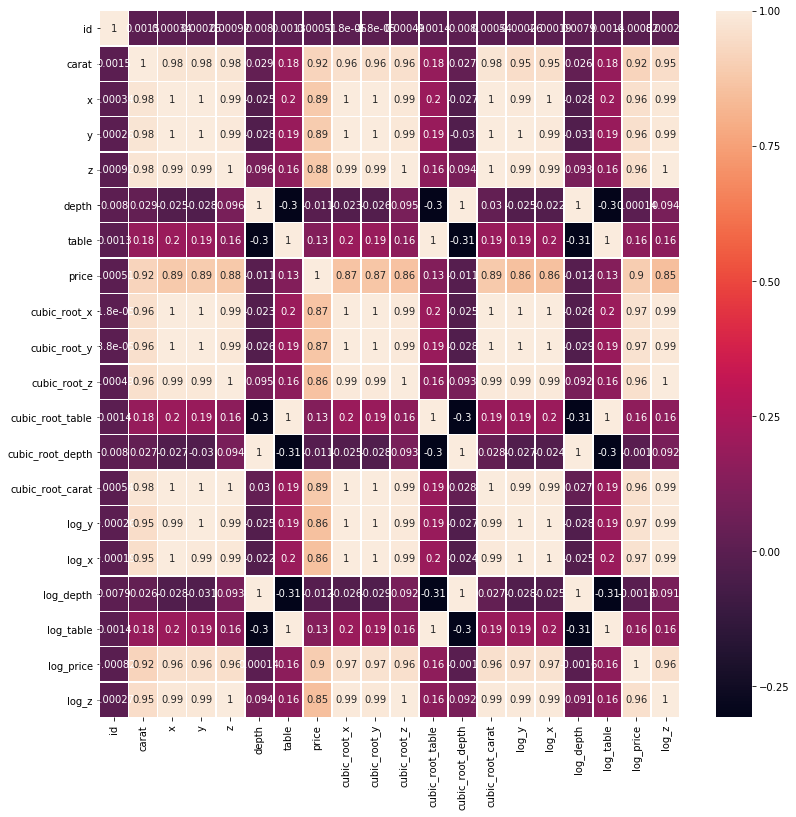

In [159]:
tcor = train.corr()
fig, ax = plt.subplots(figsize=(13,13))         # Sample figsize in inches
sb.heatmap(tcor, annot=True, linewidths=.5, ax=ax)

In [0]:
test1h = pd.get_dummies(test)

In [96]:
test1h.query("x==0 or y==0 or z==0")

,id,carat,x,y,z,depth,table,log_carat,log_depth,log_table,cubic_root_carat,cubic_root_x,cubic_root_y,cubic_root_z,cubic_root_table,cubic_root_depth,log_y,log_z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2


In [0]:
# predicao = test1h[['cubic_root_table','cubic_root_carat','cubic_root_x','log_y','z','cut_Fair','cut_Good','cut_Ideal','cut_Premium','cut_Very Good','color_D','color_E','color_F','color_G','color_H','color_I','color_J','clarity_I1','clarity_IF','clarity_SI1','clarity_SI2','clarity_VS1','clarity_VS2','clarity_VVS1','clarity_VVS2']]
# Data_set = train1h[['cubic_root_table','cubic_root_carat','cubic_root_x','log_y','z','cut_Fair','cut_Good','cut_Ideal','cut_Premium','cut_Very Good','color_D','color_E','color_F','color_G','color_H','color_I','color_J','clarity_I1','clarity_IF','clarity_SI1','clarity_SI2','clarity_VS1','clarity_VS2','clarity_VVS1','clarity_VVS2','log_price']]

In [0]:
predicao = test1h[['cubic_root_table','cubic_root_carat','cubic_root_x','log_y','z','cut_Fair','cut_Good','cut_Ideal','cut_Premium','cut_Very Good','color_D','color_E','color_F','color_G','color_H','color_I','color_J','clarity_I1','clarity_IF','clarity_SI1','clarity_SI2','clarity_VS1','clarity_VS2','clarity_VVS1','clarity_VVS2']]
Data_set = train1h[['cubic_root_table','cubic_root_carat','cubic_root_x','log_y','z','cut_Fair','cut_Good','cut_Ideal','cut_Premium','cut_Very Good','color_D','color_E','color_F','color_G','color_H','color_I','color_J','clarity_I1','clarity_IF','clarity_SI1','clarity_SI2','clarity_VS1','clarity_VS2','clarity_VVS1','clarity_VVS2','log_price']]

In [0]:
X = Data_set.drop(columns='log_price')

In [0]:
Y = Data_set[['log_price']]

In [0]:
from sklearn.model_selection import KFold, cross_validate, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

#3013 0.9905700144108485


cv = KFold(n_splits=10)
SEED = 301
np.random.seed(SEED)



def teste_modelo(modelo, dadosx, dadosy):
  nome = ""
  model = str(modelo)
  for i in range(len(model)):
    if model[i] != "(":
      nome = model[0:i+1]
    else:
      results = cross_validate(modelo, dadosx, dadosy, cv = cv, return_train_score=True)
      print("Resultados para o modelo : {} - {}".format(nome, results['test_score'].mean()))


In [0]:
rfreg = RandomForestRegressor()
teste_modelo(rfreg,X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_trai

KeyboardInterrupt: ignored

In [0]:
rfreg.fit(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
np.exp(rfreg.predict(predicao))

array([13008.56396079,  5043.3051758 ,  2338.51388946, ...,
        1381.17278144,  2109.83356699,   824.59356755])

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

X_train, X_test, y_train, y_test = train_test_split(X,Y)

In [150]:
clf_rf = RandomForestRegressor()
clf_rf.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_rf, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_rf.predict(X_test)
print('')
print('###### Random Forest ######')
print('Score : %.4f' % clf_rf.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s


###### Random Forest ######
Score : 0.9904
[0.98983092 0.99105403 0.98953865 0.99031527 0.98956674]

MSE    : 0.01 
MAE    : 0.07 
RMSE   : 0.10 
R2     : 0.99 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.4s finished


In [0]:
no_of_test=[100,150]

params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict)

In [152]:

clf_rf.fit(X_train,y_train)
print('Score : %.4f' % clf_rf.score(X_test, y_test))
pred=clf_rf.predict(X_test)
r2 = r2_score(y_test, pred)
print('R2     : %0.2f ' % r2)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

Score : 0.9912
R2     : 0.99 


In [137]:
clf_rf.best_params_

{'max_features': 'auto', 'n_estimators': 150, 'n_jobs': -1}

In [0]:
clf_rf

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_features': ['auto', '

In [153]:
clf_rf.fit(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change 

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_features': ['auto', '

In [140]:
from sklearn.tree import export_graphviz
import graphviz

features = Data_set.columns

dot_data = export_graphviz(clf_rf, feature_names = features, filled=True, rounded=True)#filled e rounded sao so frescura pra ficar bonito
grafico = graphviz.Source(dot_data)
grafico

NotFittedError: ignored

In [154]:
sample_sub.head()

,price
0,12854.403477
1,5110.672410
2,2374.328935
3,4695.712807
4,2329.443138


In [155]:
sample_sub['price'] =np.exp(clf_rf.predict(predicao))
sample_sub.head()

,price
0,12884.870331
1,5105.721498
2,2377.589435
3,4702.140743
4,2329.443138


In [0]:
sample_sub = sample_sub.drop(columns='id')

In [0]:
sample_sub.to_csv('TesteSemTableCX.csv')

In [0]:
X = Data_set.drop(columns=['log_price'])

In [0]:
Y = Data_set['log_price']


In [0]:
rfr = RandomForestRegressor(random_state=SEED)

mtrand.RandomState

In [0]:
teste_modelo(rfr, X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

Resultados para o modelo : RandomForestRegressor - 0.9904646563692447


In [0]:
rfr.fit(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=301, verbose=0,
                      warm_start=False)

In [0]:
np.exp(rfr.predict(predicao))

array([13352.19835605,  5314.76194481,  2355.94381021, ...,
        1300.75363372,  2167.39156216,   782.55824093])

In [0]:
sample_sub['price'] = np.exp(rfr.predict(predicao))
sample_sub.head()

,price
0,13352.198356
1,5314.761945
2,2355.943810
3,5026.297543
4,2287.673553


In [0]:
sample_sub = sample_sub.drop(columns='id')
sample_sub.head()

,price
0,12429.533651
1,5112.802231
2,2415.265568
3,4969.915136
4,2218.346142


In [0]:
sample_sub.to_csv('treino5.csv')